In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'

# Custom Palette: Green for Safe (0), Red for Fire (1)
custom_palette = {0: "#2ecc71", 1: "#e74c3c"}

print("Environment Ready")

Environment Ready


In [3]:
# Load data
df = pd.read_csv("final_advanced_dataset.csv")

# Convert date column to datetime objects
df['date'] = pd.to_datetime(df['date'])

print(f"Loaded {len(df)} samples.")
print(f"Fires: {len(df[df['fire_occurred']==1])}")
print(f"Non-Fires: {len(df[df['fire_occurred']==0])}")

# Preview
df.head()

Loaded 78 samples.
Fires: 50
Non-Fires: 28


,latitude,longitude,date,fire_occurred,temperature,humidity,wind_speed,rain_7d_sum,rain_30d_sum,temp_7d_avg,temp_30d_max,ndvi,rgb_image,ndvi_image
0,-9.26583,124.42258,2023-09-16,1,32.0,30,15.0,0.5,2.4,32.757143,33.9,0.292907,2023-09-16_-926583_12442258_rgb.png,2023-09-16_-926583_12442258_ndvi.png
1,-8.85061,125.79690,2023-10-19,1,27.9,32,14.2,1.5,6.2,26.757143,29.5,0.391717,2023-10-19_-885061_1257969_rgb.png,2023-10-19_-885061_1257969_ndvi.png
2,18.39248,102.15316,2023-03-11,1,32.5,46,4.1,0.0,1.4,32.214286,35.5,0.388811,2023-03-11_1839248_10215316_rgb.png,2023-03-11_1839248_10215316_ndvi.png
3,-8.85061,125.79690,2023-04-22,0,22.5,74,12.7,60.0,140.3,23.214286,26.1,0.085795,2023-04-22_-885061_1257969_rgb.png,2023-04-22_-885061_1257969_ndvi.png
4,18.60492,104.98239,2022-09-18,0,26.4,70,2.3,37.2,263.1,25.414286,28.5,0.146344,2022-09-18_1860492_10498239_rgb.png,2022-09-18_1860492_10498239_ndvi.png


/var/folders/hm/5m8v39gs5yj35nkyd_qbnpzm0000gn/T/ipykernel_31346/760167754.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No Fire", "Fire"])
/var/folders/hm/5m8v39gs5yj35nkyd_qbnpzm0000gn/T/ipykernel_31346/760167754.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Fire", "Fire"])
/var/folders/hm/5m8v39gs5yj35nkyd_qbnpzm0000gn/T/ipykernel_31346/760167754.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["No Fire", "Fire"])


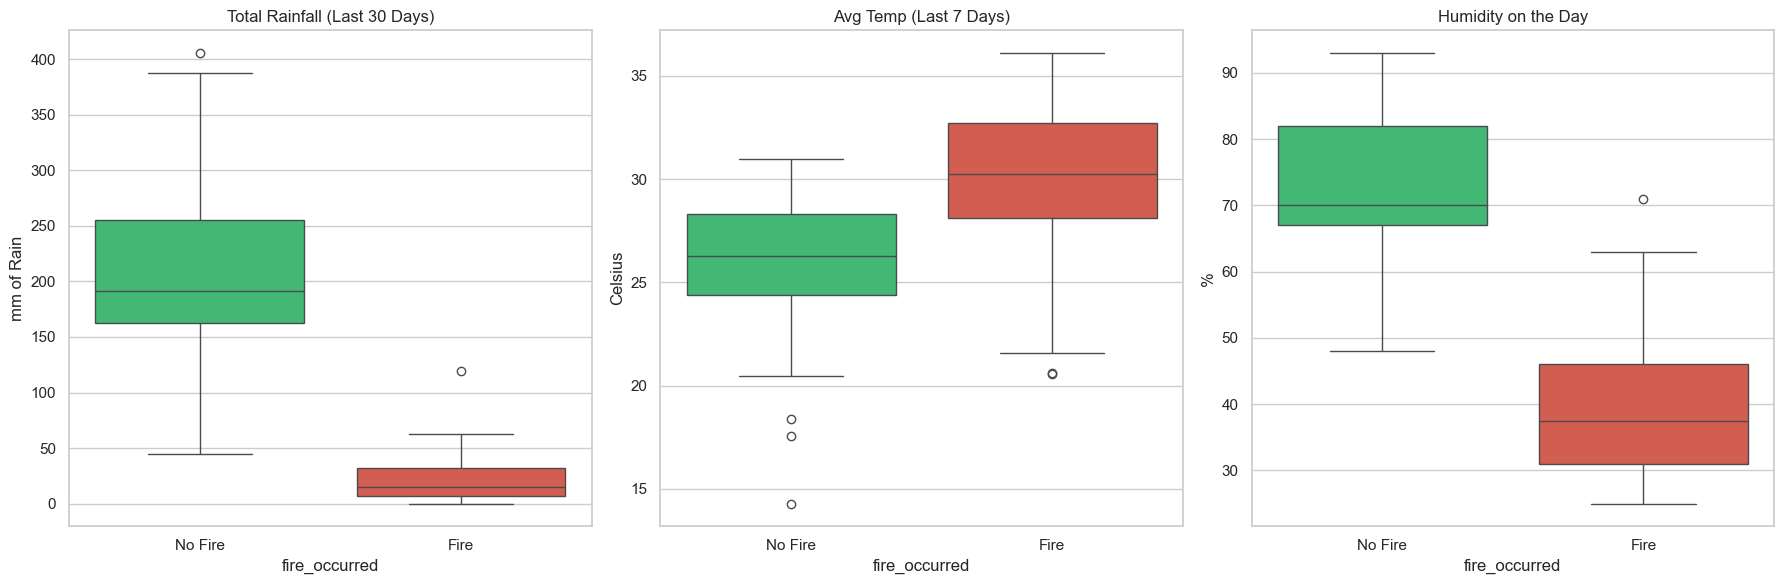

In [12]:
# Update Palette to handle potential String vs Integer mismatch
# We map both 0 and "0" to be safe
custom_palette = {
    0: "#2ecc71", 1: "#e74c3c", 
    "0": "#2ecc71", "1": "#e74c3c"
}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. 30-Day Rainfall Sum
sns.boxplot(
    ax=axes[0], 
    data=df, 
    x='fire_occurred', 
    y='rain_30d_sum', 
    hue='fire_occurred', # Required for palette in new Seaborn versions
    palette=custom_palette,
    legend=False
)
axes[0].set_title("Total Rainfall (Last 30 Days)")
axes[0].set_ylabel("mm of Rain")
axes[0].set_xticklabels(["No Fire", "Fire"])

# 2. 7-Day Average Temperature
sns.boxplot(
    ax=axes[1], 
    data=df, 
    x='fire_occurred', 
    y='temp_7d_avg', 
    hue='fire_occurred',
    palette=custom_palette, 
    legend=False
)
axes[1].set_title("Avg Temp (Last 7 Days)")
axes[1].set_ylabel("Celsius")
axes[1].set_xticklabels(["No Fire", "Fire"])

# 3. Live Humidity
sns.boxplot(
    ax=axes[2], 
    data=df, 
    x='fire_occurred', 
    y='humidity', 
    hue='fire_occurred',
    palette=custom_palette, 
    legend=False
)
axes[2].set_title("Humidity on the Day")
axes[2].set_ylabel("%")
axes[2].set_xticklabels(["No Fire", "Fire"])

plt.tight_layout()
plt.show()

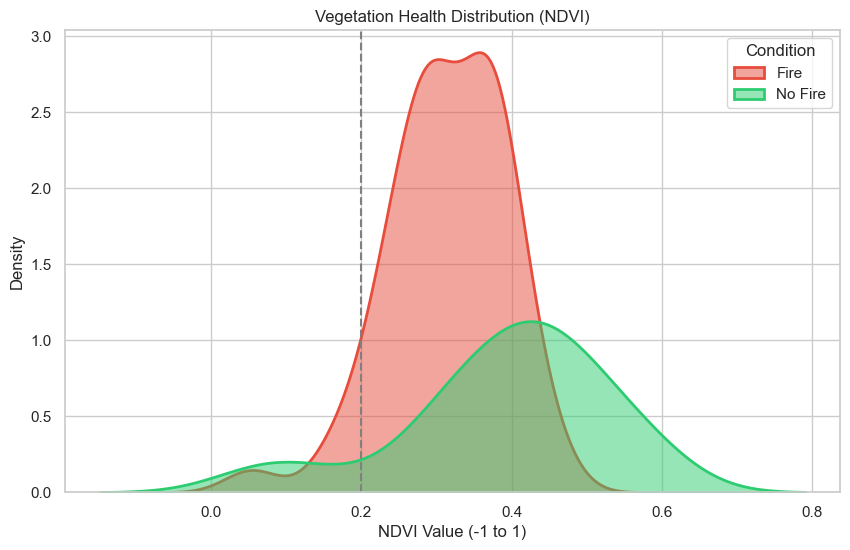

In [5]:
plt.figure(figsize=(10, 6))

# KDE Plot (Density) shows the shape of the data beautifully
sns.kdeplot(data=df, x='ndvi', hue='fire_occurred', fill=True, palette=custom_palette, alpha=0.5, linewidth=2)

plt.title("Vegetation Health Distribution (NDVI)")
plt.xlabel("NDVI Value (-1 to 1)")
plt.axvline(0.2, color='grey', linestyle='--', label="Dry Vegetation Threshold")
plt.legend(title="Condition", labels=["Fire", "No Fire"])
plt.show()

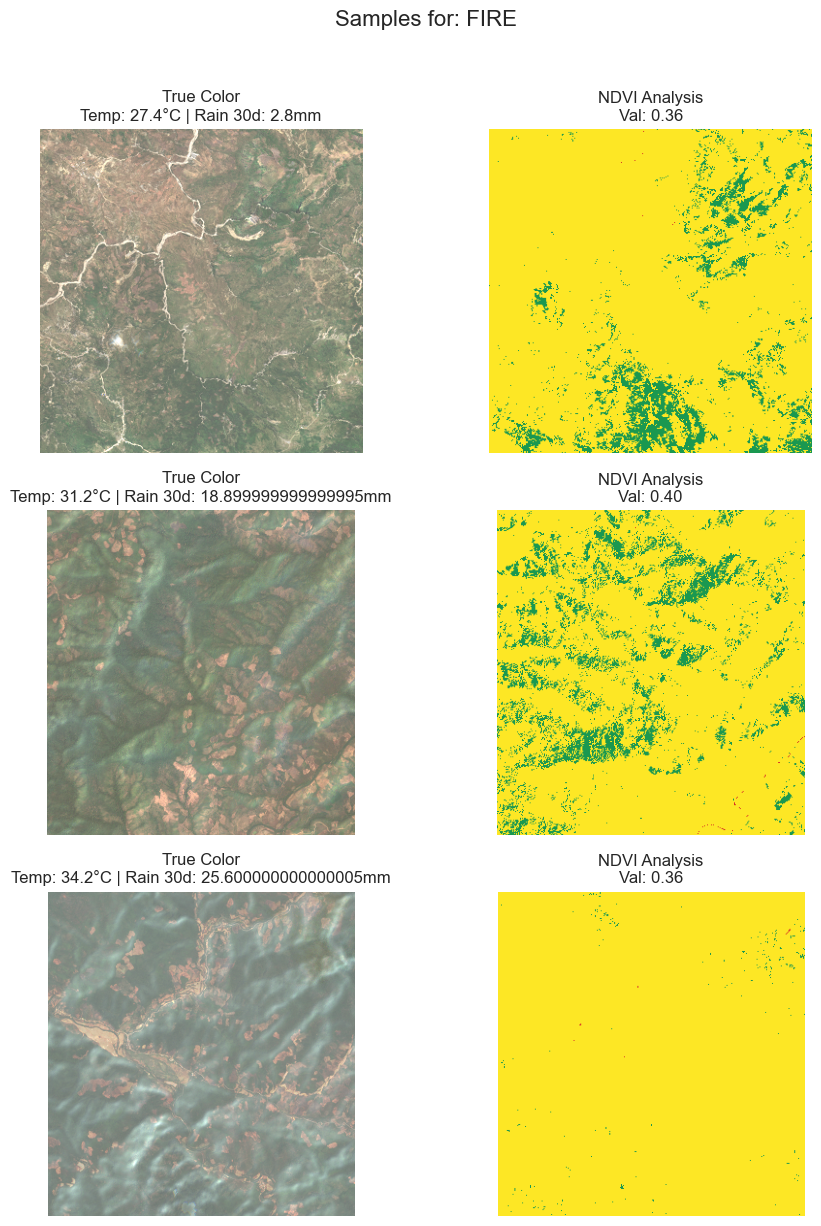

In [7]:
def show_sample_images(condition, n=3):
    """
    Shows n random images for a specific condition (Fire=1 or 0)
    """
    samples = df[df['fire_occurred'] == condition].sample(n)
    
    fig, axes = plt.subplots(n, 2, figsize=(10, 4*n))
    fig.suptitle(f"Samples for: {'FIRE' if condition==1 else 'NO FIRE'}", fontsize=16, y=1.02)
    
    for i, (_, row) in enumerate(samples.iterrows()):
        # Paths
        rgb_path = os.path.join("images", row['rgb_image'])
        ndvi_path = os.path.join("images", row['ndvi_image'])
        
        # Load Images
        if os.path.exists(rgb_path) and os.path.exists(ndvi_path):
            img_rgb = Image.open(rgb_path)
            img_ndvi = Image.open(ndvi_path)
            
            # Plot RGB
            axes[i, 0].imshow(img_rgb)
            axes[i, 0].set_title(f"True Color\nTemp: {row['temperature']}°C | Rain 30d: {row['rain_30d_sum']}mm")
            axes[i, 0].axis('off')
            
            # Plot NDVI
            axes[i, 1].imshow(img_ndvi)
            axes[i, 1].set_title(f"NDVI Analysis\nVal: {row['ndvi']:.2f}")
            axes[i, 1].axis('off')
        else:
            axes[i, 0].text(0.5, 0.5, "Image Not Found", ha='center')

    plt.tight_layout()
    plt.show()

# Show 3 Fire examples
show_sample_images(condition=1, n=3)

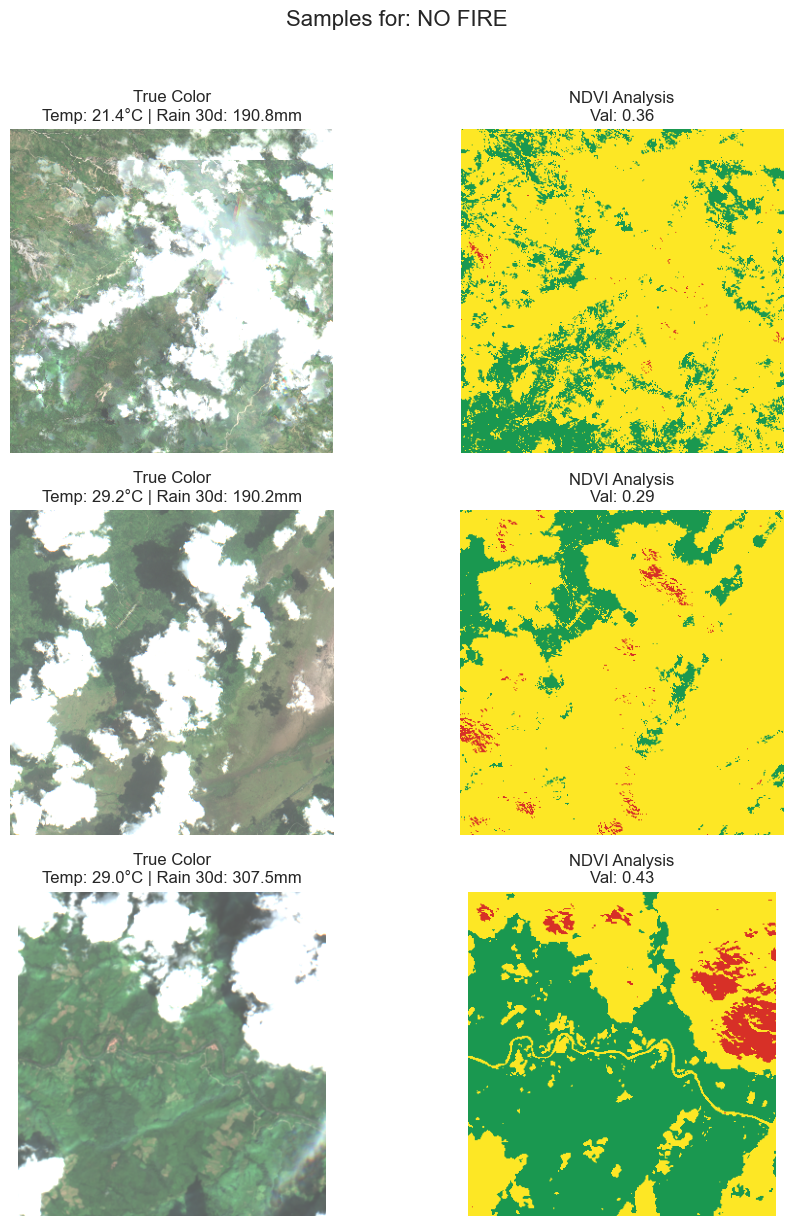

In [8]:
# Show 3 Non-Fire examples
show_sample_images(condition=0, n=3)